# I. - PREFACE

Nama: Muhammad Fariz Firdaus

Batch: SBY002

## 1. - Background

Hotel booking cancellations are a major problem for the hotel industry, as they might cause significant revenue losses to the owner. In 2022, 20% hotel bookings are being cancelled, which means that 1 out of 5 of the bookings are not realized ([source](https://revenue-hub.com/three-most-common-trends-impacting-cancellation-rates/)). Moreover, cancellations are often unpredictable and depend a lot factors, such as the deposit type, the customer profile, and the seasonality. Therefore, it is important for hotel managers to have a way of forecasting the demand and the cancellation probability for each booking, so that they can optimize their pricing, inventory, and operational strategies.

XYZ a tourism company that have been experiencing a lot of cancellation in some of their hotel. They need a classification machine learning model that can help them forecast whether or not a customer is going to cancel their booking.

## 2. - Objective 🏨

The objective of this project is to help XYZ company by building a supervised classification model that can predict whether a booking will be cancelled or not, based on the hotel [booking demand dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand). The expected outcome of the project is a machine learning model that can help XYZ's hotel managers reduce the impact of cancellations and increase their revenue.

# II. - LIBRARIES

In [1]:
# Data manipulation and analysis
import pandas as pd  # data manipulation and analysis
import numpy as np  # numerical operations

# Data visualization
import matplotlib.pyplot as plt  # basic plotting library

# Statistical analysis
import scipy.stats as st  # statistical functions

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # metrics
from sklearn.neighbors import KNeighborsClassifier  # K-nearest neighbors model
from sklearn.svm import SVC  # support vector machine model
from sklearn.tree import DecisionTreeClassifier  # decision tree model
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, # ensemble models
from sklearn.decomposition import PCA  # principal component analysis
from sklearn.compose import ColumnTransformer  # to apply different preprocessing to different columns
from sklearn.pipeline import Pipeline  # to assemble steps for cross validation
from imblearn.pipeline import Pipeline as imbPipeline  # pipeline from imbalanced-learn package
from sklearn.model_selection import cross_val_score  # cross validation score
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import shap

# Optimization
import optuna  # hyperparameter optimization

# Timing
import time  # timing execution

# Serialization
import pickle  # object serialization

# disable warnings
import warnings
warnings.filterwarnings('ignore')  # turn off warnings

d:\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


# III. - DATA LOADING

## 1. - Dataset Introduction

The dataset i'm using for this project is a dataset from a paper titled [Hotel Booking Demand Dataset](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

## 2. - Loading

In [2]:
data = pd.read_csv('deployment\\hotel_bookings.csv')

Save a copy as raw data backup

In [3]:
data_copy = data.copy()

In [4]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


The dataset have successfully loaded

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The imported dataframe is a 119390 rows of data with 32 columns, with missing values in some column.

## 3. - Cleaning

For easier EDA later, I need to handle the missing values.

In [6]:
for column in data.columns:
    percent_missing = data[column].isnull().mean() * 100
    if percent_missing > 0:
        print(column, percent_missing)

children 0.003350364352123293
country 0.40874445095904177
agent 13.686238378423655
company 94.30689337465449


Agent and company column represent the identification number of the travel agency or company that made the booking. However, many bookings are made directly by the customers, not by travel agencies, so this column is often empty. So, I will replace the missing values in each of them with 0, and I will remove company column directly as it contains 94% missing values, which won't gives any information.

In [7]:
data.drop(columns=['company'], inplace=True)
data.fillna(0, inplace = True)

In [8]:
for column in data.columns:
    percent_missing = data[column].isnull().mean() * 100
    if percent_missing > 0:
        print(column, percent_missing)

No more missing value left.

I noticed while exploring the dataset that some bookings have 0 guests. This mean the column children, adults, and babies are 0. This kind of data is ambigious and might be bad for analysis and prediction. So, I will remove them.

In [9]:
filter = (data.children == 0) & (data.adults == 0) & (data.babies == 0)
len(data[filter])/len(data) * 100

0.1507663958455482

there's 0.15% of them in the dataset, so it's safe to remove them.

In [10]:
no_guest = data[(data['children'] == 0) & (data['adults'] == 0) & (data['babies'] == 0)].index
data_clean = data.drop(no_guest)

# drop and reset index of the cleaned new dataset
data_clean.reset_index(drop=True, inplace=True)
data_clean.shape

(119210, 31)

In [11]:
data_clean.to_csv('deployment\\hotel_bookings_clean.csv',index=False)

# IV. - EXPLORATORY DATA ANALYSIS (EDA)

Data exploration analysis in this project will be done by focusing on some columns.

## 1. - `country`🌏

Country column in the dataset explains the country of origin of each customer who made the booking.

### 1.1. - What are the most common countries of the bookings for each hotel type?

In [12]:
# Group the data by hotel type and count the frequency of each country
country_count = data_clean.groupby("hotel")["country"].value_counts()

# Sort the results in descending order
country_count = country_count.sort_values(ascending=False)

# Select the top countries for each hotel type
top_countries = country_count.groupby("hotel").head()

# Print the results
print(top_countries)

hotel         country
City Hotel    PRT        30861
Resort Hotel  PRT        17622
City Hotel    FRA         8791
Resort Hotel  GBR         6813
City Hotel    DEU         6082
              GBR         5307
              ESP         4604
Resort Hotel  ESP         3956
              IRL         2166
              FRA         1610
Name: count, dtype: int64


For the city hotel, the top countries are Portugal (PRT), France (FRA), United Kingdom (GBR), Germany (DEU), and Spain (ESP).

For the resort hotel, the top countries are Portugal (PRT), United Kingdom (GBR), Spain (ESP), Ireland (IRL) and France (FRA).

For better analysis, I can visualize them using bar chart.

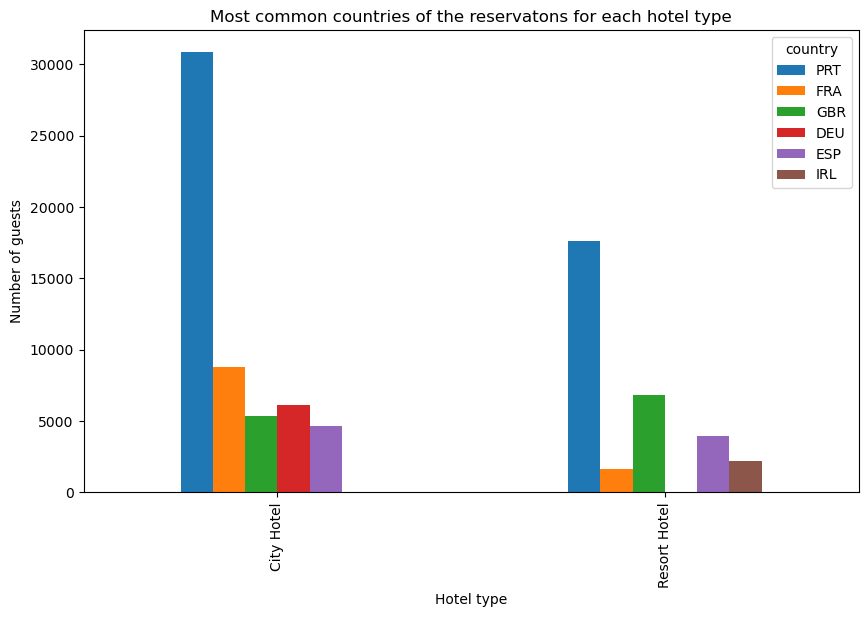

In [13]:
# Plot the bar chart
top_countries.unstack().plot(kind="bar", figsize=(10, 6))

# Add labels and title
plt.xlabel("Hotel type")
plt.ylabel("Number of guests")
plt.title("Most common countries of the reservatons for each hotel type")

# Show the plot
plt.show()

As can be seen in the visualization, both hotels are very popular in europian countries, especially Portugal.

Overall, XYZ should target more guests from these top countries. They also should try to explore market potential in countries nearby those top countries, as the citizens may have similar preferences or needs. They should also increase their customer loyalty by customizing their services based on those countries cultures, for example serving sourthern europian dishes, or offering promos on those countries national holidays.

## 2. - `arrival_date` 📅

the column `arrival_date_year` and `arrival_date_month` in the dataset explains the time the customers arrive.

### 2.1. - What are the peak and low seasons for each hotel type based on the arrival date?

to answer this EDA question, I will focus on the month.

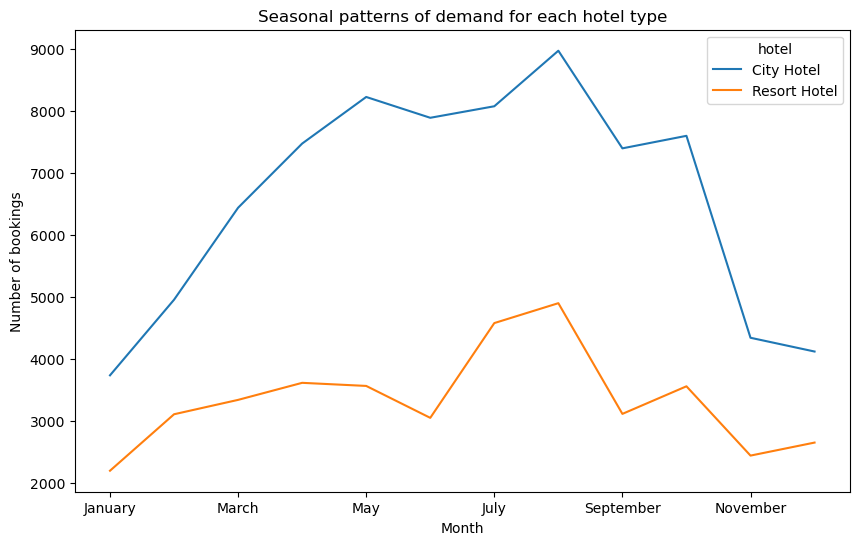

In [14]:
# Define the custom order of the months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert the arrival_date_month column into a categorical variable with the custom order
data_clean["arrival_date_month"] = pd.Categorical(data_clean["arrival_date_month"], categories=month_order, ordered=True)

# Group the data by hotel type and arrival date month and count the number of bookings
month_count = data_clean.groupby(["hotel", "arrival_date_month"]).size()

# Plot the line chart
month_count.unstack(level=0).plot(kind="line", figsize=(10, 6))

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of bookings")
plt.title("Seasonal patterns of demand for each hotel type")

# Show the plot
plt.show()

Both hotel has similar seasonal pattern where the peak arrival of customers are in August, while the lowest arrival of custumers are in January.

To adress this, the company should prepare for their services in summer season, especially in August. This recommendation also supported by the fact that summer is holiday season in most europian countries, especially Portugal.

To prepare apropriately, the company should also acknowledge the fact that their hotels are not popular in winter, the lowes in January, and will gradually rises again at the end of winter (February).

### 2.2. - How do the seasons influence the cancellation rate?

First, I have to make season column.

In [15]:
# Create a season column using a lambda function
data_clean["season"] = data_clean["arrival_date_month"].apply(lambda x: "Winter" if x in ["January", "February", "December"]
                                                            else "Spring" if x in ["March", "April", "May"]
                                                            else "Summer" if x in ["June", "July", "August"]
                                                            else "Fall")

In [16]:
# Group the data by season and hotel type
season_group = data_clean.groupby(["season", "hotel"])

# Calculate the cancellation rate for each season and hotel type
cancellation_rate = season_group.apply(lambda x: x["is_canceled"].value_counts(normalize=True)[1] * 100)

print("Cancellation rate by season and hotel type:")
print(cancellation_rate)

Cancellation rate by season and hotel type:
season  hotel       
Fall    City Hotel      41.595073
        Resort Hotel    26.868953
Spring  City Hotel      42.926234
        Resort Hotel    27.099600
Summer  City Hotel      41.840870
        Resort Hotel    32.611302
Winter  City Hotel      39.995310
        Resort Hotel    22.045855
dtype: float64


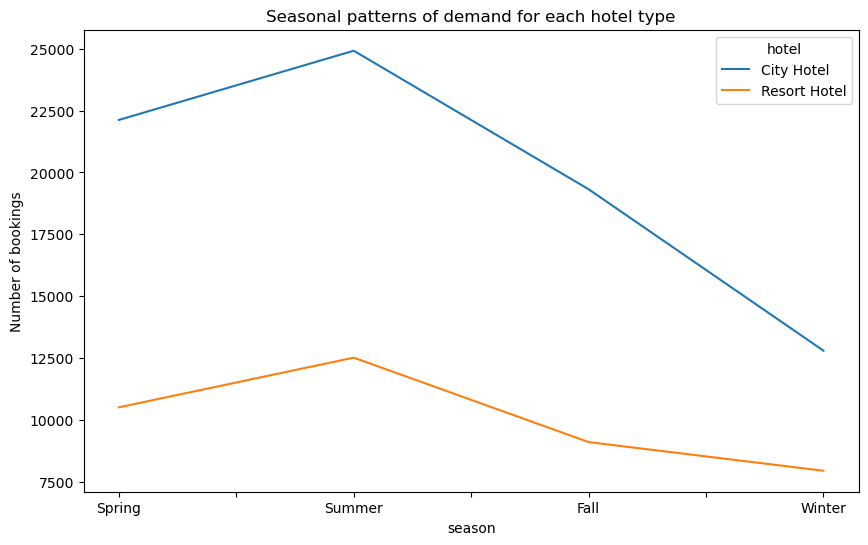

In [17]:
# Define the custom order of the seasons
season_order = ["Spring", "Summer", "Fall", "Winter"]

# Convert the arrival_date_season column into a categorical variable with the custom order
data_clean["season"] = pd.Categorical(data_clean["season"], categories=season_order, ordered=True)

# Group the data by hotel type and arrival date season and count the number of bookings
season_count = data_clean.groupby(["hotel", "season"]).size()

# Plot the line chart
season_count.unstack(level=0).plot(kind="line", figsize=(10, 6))

# Add labels and title
plt.xlabel("season")
plt.ylabel("Number of bookings")
plt.title("Seasonal patterns of demand for each hotel type")

# Show the plot
plt.show()

In both hotel, the cancellation is highest in Summer, this makes sense as the reservations are also peaked at Summer.

To address this, the company may have to implement some policies or incentives to discourage cancellations, especially in the Summer seasons, when the demand is high. For example, the company can charge a cancellation fee.

## 3. - Average Daily Rate (`adr`) 💰

The `adr` is the amount of money that a guest pays per night at a hotel.

### 3.1. - Is there a significant difference in the average daily rate (`adr`) between the city hotel and the resort hotel?

$H0$: there is no difference in the ADR between the city hotel and resort hotel.

$H1$: there is a difference in the ADR between the city hotel and resort hotel.

In [18]:
# Filter the data_clean by hotel type and cancellation status
city = data_clean[(data_clean["hotel"] == "City Hotel") & (data_clean["is_canceled"] == 0)]["adr"]
resort = data_clean[(data_clean["hotel"] == "Resort Hotel") & (data_clean["is_canceled"] == 0)]["adr"]

In [19]:
# Perform the t-test
t_stat, p_value = st.ttest_ind(city, resort, equal_var=True)

# Calculate the mean value of each hotel type
city_mean = city.mean()
resort_mean = resort.mean()

# Print the results
print("City hotel mean ADR:", city_mean)
print("Resort hotel mean ADR:", resort_mean)
print(t_stat, p_value)

City hotel mean ADR: 106.03614117698118
Resort hotel mean ADR: 90.82252670515436
41.80945015293037 0.0


In [20]:
# Menentukan tingkat signifikansi (alpha)
alpha = 0.05

# Menguji hipotesis
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


The H0 is sucessfully rejected, so there is a significance difference between them. The tstat is very large, which means that the `adr` of the city hotel and the resort hotel are very different, with city hotel having higher `idr` generated. XYZ should focus on their city hotel, since it generates more money for them.

## 4. - `is_canceled` ❌

`is_canceled` column explains wheter or not a booking was cancelled by customers.

### 4.1. - What are the features that minght affect whether or not a bookings is canceled?

In this project, I'm going to predict the `is_canceled` column. So, in order to do easier feature engineering later, I need to gain insights about how are the relationships between `is_canceled` compared to all the other columns.

In [21]:
data_clean.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'season'],
      dtype='object')

In [22]:
col_cat=['hotel', 'arrival_date_month', 'arrival_date_day_of_month',
        'meal', 'country', 'market_segment', 'distribution_channel',
        'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
        'deposit_type', 'agent', 'customer_type', 'reservation_status',
        'reservation_status_date'
        ]
col_num=['lead_time','arrival_date_year', 'arrival_date_week_number',
        'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
        'children', 'babies', 'previous_cancellations',
        'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
        'adr', 'required_car_parking_spaces', 'total_of_special_requests',
        ]

Because the target output (`is_canceled`) is in the form of categorical data, then to calculate the correlation statistics, I will use `kendall` method for numerical columns, and `chi-squared` method for categorical columns. For easier calculations, I will create a function first.

In [23]:
def calculate_corr_with_is_canceled(data, column_names, column_type):
    """
    This function calculates how each column is related to the 'is_canceled' column in the DataFrame.
    It uses different methods for different types of columns (kendall or chi-square).
    It prints the results for each column.
    """

    # Calculate and print the results for each column
    for i in range(len(column_names)):
        column_name = column_names[i]

        if column_type == 'num':
            # Use kendall method for numerical columns
            method = 'Kendall'
            result, p_value = st.kendalltau(data[column_name], data['is_canceled'])

        elif column_type == 'cat':
            # Use chisquare method for categorical columns
            method = 'Chisquare'

            # Make a table that shows the frequency of each combination of values
            table = pd.crosstab(data[column_name], data['is_canceled'])

            # Do the chisquare test on the table
            chi2, p_value, dof, expected = st.chi2_contingency(table)

            # Calculate the result as the square root of chi2 divided by the number of rows
            result = np.sqrt(chi2 / data.shape[0])

        print(f"{method} correlation result for '{column_name}' and 'is_canceled':")
        print(f"Result: {result}")
        print(f"P-value: {p_value}")
        print("\n")


first for categorical columns.

In [24]:
calculate_corr_with_is_canceled(data, col_cat, 'cat')

Chisquare correlation result for 'hotel' and 'is_canceled':
Result: 0.13651290309212544
P-value: 0.0


Chisquare correlation result for 'arrival_date_month' and 'is_canceled':
Result: 0.07021986659432775
P-value: 3.671822609327152e-119


Chisquare correlation result for 'arrival_date_day_of_month' and 'is_canceled':
Result: 0.0520198033385949
P-value: 7.233901875186373e-51


Chisquare correlation result for 'meal' and 'is_canceled':
Result: 0.05048024467506253
P-value: 1.3212351959124216e-64


Chisquare correlation result for 'country' and 'is_canceled':
Result: 0.36107186925555834
P-value: 0.0


Chisquare correlation result for 'market_segment' and 'is_canceled':
Result: 0.26678079336123384
P-value: 0.0


Chisquare correlation result for 'distribution_channel' and 'is_canceled':
Result: 0.17712830873840107
P-value: 0.0


Chisquare correlation result for 'is_repeated_guest' and 'is_canceled':
Result: 0.08474407889696026
P-value: 1.7841252215934033e-188


Chisquare correlation result fo

now numerical columns.

In [25]:
calculate_corr_with_is_canceled(data, col_num, 'num')

Kendall correlation result for 'lead_time' and 'is_canceled':
Result: 0.25952805130209367
P-value: 0.0


Kendall correlation result for 'arrival_date_year' and 'is_canceled':
Result: 0.01718146692538044
P-value: 4.311235517981863e-10


Kendall correlation result for 'arrival_date_week_number' and 'is_canceled':
Result: 0.006258358232382134
P-value: 0.008737568414915908


Kendall correlation result for 'stays_in_weekend_nights' and 'is_canceled':
Result: -0.0038496457024229207
P-value: 0.1560259966856238


Kendall correlation result for 'stays_in_week_nights' and 'is_canceled':
Result: 0.036872441330369536
P-value: 1.8695287571190324e-46


Kendall correlation result for 'adults' and 'is_canceled':
Result: 0.06560449047857986
P-value: 1.166735480451581e-118


Kendall correlation result for 'children' and 'is_canceled':
Result: -0.0027780572046767977
P-value: 0.33281247323361207


Kendall correlation result for 'babies' and 'is_canceled':
Result: -0.03430407545526752
P-value: 2.0560314491

I'm going to filter them based on their p-value. columns with p-value lower than 0.05 means their correlation with diabetic are by chance.

Here is a list of useless columns based on the Kendall and chi square correlation results:

In [26]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
            'reservation_status', 'country', 'days_in_waiting_list']

# V. - FEATURE ENGINEERING

## 1. - Split Features(X) dan target (y)

In [27]:
# separate X and y by focusing on default_payment_next_month column
X = data_clean.drop('is_canceled', axis=1)
y = data_clean['is_canceled']

In [28]:
# Print the new shape
print('Feature (X) :', X.shape)
print('Target (y) :', y.shape)

Feature (X) : (119210, 31)
Target (y) : (119210,)


X is a datafreame with 119210 rows and 31 columns.

Because the model that I'm going to make is a classification model, I will also calculate the ratio for each prediction class, to check for data imbalance.

In [29]:
y.value_counts()

is_canceled
0    75011
1    44199
Name: count, dtype: int64

class 0 = 62.9%, class 1 = 33.1%

This means the dataset is just mildly imbalanced, where 33.1% reservations are canceled, while the rest are not.

## 3. - Split Train set and Test set

In [30]:
# split data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify=y, random_state=2)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
print('Train Size :', y_train.shape)
print('Test Size :', y_test.shape) 

Train Size : (79870, 31)
Test Size : (39340, 31)
Train Size : (79870,)
Test Size : (39340,)


With the ratio of 7:3, the train and test sets are created for model training and evaluation purposes.

## 4. - Feature Selection

In [31]:
# redefine X_train based on column to keep
X_train.drop(useless_col, axis = 1, inplace = True)
X_test.drop(useless_col, axis = 1, inplace = True)

In [32]:
# Print the new shape
print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (79870, 25)
Test Size : (39340, 25)


Now only 25 columns remaining that act as the features (X).

## 5. - Feature Creation

To reduce cardinality, I will extract day, month, and year columns from reservation_statuse_date.

In [34]:
X_test['reservation_status_date'] = pd.to_datetime(X_test['reservation_status_date'])

X_test['year'] = X_test['reservation_status_date'].dt.year
X_test['month'] = X_test['reservation_status_date'].dt.month
X_test['day'] = X_test['reservation_status_date'].dt.day

X_test.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True) # these column become useless

X_test.head()

,hotel,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,season,year,month,day
58882,City Hotel,605,43,17,1,2,2,0.0,0,BB,...,Non Refund,1.0,Transient,60.00,0,0,Fall,2016,9,20
15178,Resort Hotel,253,37,12,2,5,2,0.0,0,BB,...,Non Refund,96.0,Transient,58.95,0,0,Fall,2015,6,17
53102,City Hotel,344,25,16,0,2,2,0.0,0,BB,...,Non Refund,1.0,Transient,62.00,0,0,Summer,2015,10,21
97363,City Hotel,31,38,16,0,1,2,0.0,0,SC,...,No Deposit,8.0,Transient,125.10,0,1,Fall,2016,9,17
52643,City Hotel,130,24,9,0,2,3,0.0,0,BB,...,No Deposit,9.0,Transient,159.30,0,0,Summer,2016,2,15


## 5. - Split numerical column and categorical column

In [35]:
cat_col = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'deposit_type', 'customer_type', 'season', 'year', 'month', 'day']
num_col = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

In [36]:
# split based on data type
X_train_cat = X_train[cat_col]
X_train_num = X_train[num_col]
X_test_cat = X_test[cat_col]
X_test_num = X_test[num_col]

In [37]:
# Negative columns doesnt make sense in this case
rows_with_negative = X_train_num.lt(0).any(axis=1)
X_train_num = X_train_num.loc[~rows_with_negative]
X_train = X_train.loc[X_train_num.index]
y_train = y_train.loc[X_train_num.index]

## 8. - Feature Scaling and Encoding

### 8.1. - Scaling

First, I need to identify the skewed columns before normalizing them.

In [38]:
X_train_num.var()

lead_time                         11371.955557
arrival_date_week_number            185.407314
arrival_date_day_of_month            77.090384
stays_in_weekend_nights               0.992416
stays_in_week_nights                  3.620064
adults                                0.359867
children                              0.158914
babies                                0.008878
previous_cancellations                0.693635
previous_bookings_not_canceled        2.351813
agent                             11502.175038
adr                                2656.446357
required_car_parking_spaces           0.059597
total_of_special_requests             0.629499
dtype: float64

For this project, I set the treshold for normal distribution data is 5 variance. I will normalize those that has high variance.

Having low values of variance in each columns will help the model predict.

In [40]:
def normalize(df):
    df['lead_time'] = np.log(df['lead_time'] + 1)
    df['arrival_date_week_number'] = np.log(df['arrival_date_week_number'] + 1)
    df['arrival_date_day_of_month'] = np.log(df['arrival_date_day_of_month'] + 1)
    df['agent'] = np.log(df['agent'] + 1)
    df['adr'] = np.log(df['adr'] + 1)
    return df

In [41]:
# Create a FunctionTransformer instance
normalize_transformer = FunctionTransformer(normalize)

### 8.2. - Encoding

In [42]:
def encode(df):
    df['hotel'] = df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
    df['meal'] = df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
    df['market_segment'] = df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})
    df['distribution_channel'] = df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4})
    df['reserved_room_type'] = df['reserved_room_type'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11})
    df['deposit_type'] = df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})
    df['customer_type'] = df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})
    df['season'] = df['season'].map({'Spring':0, 'Summer':1, 'Fall':2, 'Winter':3})
    df['year'] = df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})
    return df

In [43]:
# Create a FunctionTransformer instance
encode_transformer = FunctionTransformer(encode)

In [44]:
# Create the column transformer
preprocessor = ColumnTransformer(transformers=[
        ('num', normalize_transformer, num_col),
        ('cat', encode_transformer, cat_col)
        ])

# VI. - MODEL DEFINITION

For this project, I will use multiple machine learning algorithm to see which algorithm fits the case perfectly. The algorithm I'm going to use are:
1. K-Nearest Neighbour
2. Support Vector Machine
3. Decision Tree
4. Random Forest
5. GradientBoosting Classifier

## 1. - K-Nearest Neighbour (KNN)

In [45]:
knn_step = KNeighborsClassifier()

## 2. - Support Vector Machine (SVM) using Bagging Clasifier

In this project, I'm using svc in a bagging classifier wrapper, rather than dierctly using svc. How this ensemble model works is by running many small SVC, insead of just one big SVC. Each SVC will make predictions on each subset of data, then the bagging classifier will implement bagging method, which is combining all results to gives final answer.

In [46]:
svm_step = BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples=0.1, n_estimators=5, random_state=2, n_jobs=-1)

## 3. - Decision Tree

In [47]:
tree_step = DecisionTreeClassifier()

## 4. - Random Forest

In [48]:
forest_step = RandomForestClassifier(random_state=2, n_jobs=-1)

## 5. - GradientBoosting Classifier

In [49]:
GradientBoosting_step = GradientBoostingClassifier()

# VII. MODEL TRAINING

For model training, I will define and fit a pipeline for each model.

## 1. - K-Nearest Neighbour (K-NN)

In [50]:
# Create a pipeline for KNN model
pipeline_knn = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", knn_step)
])

In [51]:
# Fit the pipeline on the data
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  FunctionTransformer(func=<function normalize at 0x0000024001B9F9C0>),
                                                  ['lead_time',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'agent', 'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('cat',
                                                  FunctionTransformer(func=<function encode at 0x0000024001BDB060>),
                                                  ['hotel', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'is_repeated_guest',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type', 'season',
                                                   'year', 'month', 'day'])])),
                ('model', KNeighborsClassifier())])

## 2. - Support Vector Machine (SVM)

In [52]:
# Create a pipeline for SVM model
pipeline_svm = imbPipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", svm_step)
])

In [53]:
# Fit the pipeline on the data
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  FunctionTransformer(func=<function normalize at 0x0000024001B9F9C0>),
                                                  ['lead_time',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'agent',...
                                                  FunctionTransformer(func=<function encode at 0x0000024001BDB060>),
                                                  ['hotel', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'is_repeated_guest',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type', 'season',
                                                   'year', 'month', 'day'])])),
                ('model',
                 BaggingClassifier(estimator=SVC(class_weight='balanced',
                                                 kernel='linear',
                                                 probability=True),
                                   max_samples=0.1, n_estimators=5, n_jobs=-1,
                                   random_state=2))])

## 3. - Decision Tree

In [54]:
# Create a pipeline for decision tree model
pipeline_tree = imbPipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", tree_step)
])

In [55]:
# Fit the pipeline on the data
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  FunctionTransformer(func=<function normalize at 0x0000024001B9F9C0>),
                                                  ['lead_time',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'agent', 'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('cat',
                                                  FunctionTransformer(func=<function encode at 0x0000024001BDB060>),
                                                  ['hotel', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'is_repeated_guest',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type', 'season',
                                                   'year', 'month', 'day'])])),
                ('model', DecisionTreeClassifier())])

## 4. - Random Forest

In [56]:
# Create a pipeline for random forest model
pipeline_forest = imbPipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", forest_step)
])

In [57]:
# Fit the pipeline on the data
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  FunctionTransformer(func=<function normalize at 0x0000024001B9F9C0>),
                                                  ['lead_time',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'agent',...
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('cat',
                                                  FunctionTransformer(func=<function encode at 0x0000024001BDB060>),
                                                  ['hotel', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'is_repeated_guest',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type', 'season',
                                                   'year', 'month', 'day'])])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=2))])

## 5. - GradientBoosting Classifier

In [58]:
# Create a pipeline for GradientBoosting model
pipeline_GradientBoosting = imbPipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", GradientBoosting_step)
])

In [59]:
# Fit the pipeline on the data
pipeline_GradientBoosting.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  FunctionTransformer(func=<function normalize at 0x0000024001B9F9C0>),
                                                  ['lead_time',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'agent', 'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('cat',
                                                  FunctionTransformer(func=<function encode at 0x0000024001BDB060>),
                                                  ['hotel', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'is_repeated_guest',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type', 'season',
                                                   'year', 'month', 'day'])])),
                ('model', GradientBoostingClassifier())])

# VIII. - MODEL EVALUATION

## 1. - Choosing Evaluation Matrix

Precision is a metric that measures how often a machine learning model correctly predicts the positive class. In this project case, the positive class is cancellation, which means the models need to predict whether a user will cancel their hotel booking or not. Maximizing precision is important because it will minimize false positives, which are when the model predict the reservation is going to be cancelled, when in fact the customer does not intend to cancel their booking. False positives can have negative impact on the company, such as wasting resources, losing customer satisfaction, or damaging reputation.

## 2. - Setup Evaluation Function

In [60]:
def evaluate_model_performance(pipeline, X_train, y_train, X_test, y_test, model_name):
    # Predictions on the training set
    start_time = time.time()
    train_predictions = pipeline.predict(X_train)
    train_prediction_time = time.time() - start_time

    # Predictions on the test set
    start_time = time.time()
    test_predictions = pipeline.predict(X_test)
    test_prediction_time = time.time() - start_time

    # Evaluate precision on training set
    precision_train = precision_score(y_train, train_predictions, average='binary')

    # Evaluate precision on test set
    precision_test = precision_score(y_test, test_predictions, average='binary')

    # Additional metrics
    accuracy_train = accuracy_score(y_train, train_predictions)
    accuracy_test = accuracy_score(y_test, test_predictions)
    recall_train = recall_score(y_train, train_predictions)
    recall_test = recall_score(y_test, test_predictions)
    f1_train = f1_score(y_train, train_predictions)
    f1_test = f1_score(y_test, test_predictions)

    # Cross-validation scores for precision
    cv_precision = cross_val_score(pipeline, X_train, y_train, scoring='precision', cv=5)

    # Print cross-validation precision scores
    print(f'Cross-validated Precision scores: {cv_precision}')
    
    # Print mean precision from cross-validation
    print(f'Mean Precision from Cross-validation: {cv_precision.mean()}')

    # Evaluate model quality
    if precision_train < 0.75:
        quality = 'Underfit'
    elif (precision_train - precision_test) > 0.1:
        quality = 'Overfit'
    else:
        quality = 'Good Fit'

    # Print model quality
    print(f'Model Quality: {quality}')

    # Save Metric Evaluations
    return {
        'Name': model_name,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,        
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Train f1': f1_train,
        'Test f1': f1_test,
        'Train time': train_prediction_time,
        'Test time': test_prediction_time,
        'Model Quality': quality
    }

In [61]:
results = []

## 1. - K-Nearest Neighbour (K-NN)

In [62]:
results.append(evaluate_model_performance(pipeline_knn, X_train, y_train, X_test, y_test, 'K-NN (Base)'))

Cross-validated Precision scores: [0.93358554 0.93218197 0.93785429 0.93730408 0.93140719]
Mean Precision from Cross-validation: 0.9344666144197771
Model Quality: Good Fit


## 2. - Support Vector Machine (SVM)

In [63]:
results.append(evaluate_model_performance(pipeline_svm, X_train, y_train, X_test, y_test, 'SVM (Base)'))

Cross-validated Precision scores: [0.8667154  0.84148078 0.86713119 0.86221042 0.86569343]
Mean Precision from Cross-validation: 0.8606462440529421
Model Quality: Good Fit


## 3. - Decision Tree

In [64]:
results.append(evaluate_model_performance(pipeline_tree, X_train, y_train, X_test, y_test, 'Decision Tree (Base)'))

Cross-validated Precision scores: [0.91980498 0.91785714 0.92709393 0.92249496 0.91568693]
Mean Precision from Cross-validation: 0.9205875877815283
Model Quality: Good Fit


## 4. - Random Forest

In [65]:
results.append(evaluate_model_performance(pipeline_forest, X_train, y_train, X_test, y_test, 'Random Forest (Base)'))

Cross-validated Precision scores: [0.98577844 0.98518237 0.98623161 0.98792908 0.98323917]
Mean Precision from Cross-validation: 0.9856721358773823
Model Quality: Good Fit


## 5. - Gradient Boosting

In [66]:
results.append(evaluate_model_performance(pipeline_GradientBoosting, X_train, y_train, X_test, y_test, 'Gradient Boost (Base)'))

Cross-validated Precision scores: [0.97533167 0.96878341 0.97464481 0.97013977 0.9621527 ]
Mean Precision from Cross-validation: 0.9702104729936977
Model Quality: Good Fit


## 6. - Baseline Model Comparison

In [67]:
# Create a dataframe to store the evaluation reports
eval_report = pd.DataFrame(results)
eval_report

,Name,Train Precision,Test Precision,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train f1,Test f1,Train time,Test time,Model Quality
0,K-NN (Base),0.969727,0.940127,0.926467,0.896441,0.827508,0.769711,0.892991,0.846426,9.815728,4.784225,Good Fit
1,SVM (Base),0.862865,0.867157,0.815686,0.819624,0.597913,0.606403,0.706361,0.713709,17.318512,8.699089,Good Fit
2,Decision Tree (Base),1.000000,0.925448,1.000000,0.947789,1.000000,0.934458,1.000000,0.929931,0.093342,0.046550,Good Fit
3,Random Forest (Base),1.000000,0.986445,1.000000,0.955796,1.000000,0.893048,1.000000,0.937426,0.376842,0.164575,Good Fit
4,Gradient Boost (Base),0.977664,0.978110,0.914122,0.915709,0.786344,0.790347,0.871629,0.874261,0.331502,0.150355,Good Fit


From those results, it can be seen that all models used was trained and tested with great results. I choose gradient boost as the best model so far, as it gives a very stable result, but also has very high results.

# IX. - HYPERPARAMETER TUNING

Although the results gained already very good, I will implement hyperparameter tuning to gain insights about the effect of each parameters on the model.

In this project, I'm using optuna as the hyperparameter tuning method. Optuna is a hyperparameter tuning framework. Optuna is better than other similar method like gridsearch or randomsearch because it uses smart algorithms to try fewer combinations and find the best hyperparameter faster. Other than that, using optuna I can observe the effect of tuning each parameters through each processes.

In [68]:
# Define the Gradient Boosting objective function for Optuna optimization
def gb_objective(trial):
    '''
    Optuna objective function for optimizing hyperparameters of a Gradient Boosting classifier.
    '''
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2)
    max_depth = trial.suggest_int("max_depth", 3, 10)

    model_optimize = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth
    )

    pipeline_gb = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", model_optimize)
    ])

    pipeline_gb.fit(X_train, y_train)

    pred = pipeline_gb.predict(X_test)
    precision = precision_score(y_test, pred)

    return precision

# Create an Optuna study for Gradient Boosting optimization
gb_study = optuna.create_study(direction="maximize")
gb_study.optimize(gb_objective, n_trials=10)

best_gb_params = gb_study.best_params
best_gb_precision = gb_study.best_value

print(f"Best Gradient Boosting Hyperparameters: {best_gb_params}")
print(f"Best Gradient Boosting Precision Score: {best_gb_precision}")

[I 2024-01-30 08:00:22,376] A new study created in memory with name: no-name-5709dc77-08fd-4efa-aed1-31a7eac2ffaa
[I 2024-01-30 08:00:52,073] Trial 0 finished with value: 0.9885463313813296 and parameters: {'n_estimators': 125, 'learning_rate': 0.05489385023679087, 'max_depth': 4}. Best is trial 0 with value: 0.9885463313813296.
[I 2024-01-30 08:01:41,462] Trial 1 finished with value: 0.9988547705962351 and parameters: {'n_estimators': 139, 'learning_rate': 0.08565144920992392, 'max_depth': 6}. Best is trial 1 with value: 0.9988547705962351.
[I 2024-01-30 08:03:12,199] Trial 2 finished with value: 0.9991074493649159 and parameters: {'n_estimators': 145, 'learning_rate': 0.19017940550879572, 'max_depth': 10}. Best is trial 2 with value: 0.9991074493649159.
[I 2024-01-30 08:03:49,077] Trial 3 finished with value: 0.9983382953679983 and parameters: {'n_estimators': 60, 'learning_rate': 0.14404870627228722, 'max_depth': 10}. Best is trial 2 with value: 0.9991074493649159.
[I 2024-01-30 08:

Best Gradient Boosting Hyperparameters: {'n_estimators': 145, 'learning_rate': 0.19017940550879572, 'max_depth': 10}
Best Gradient Boosting Precision Score: 0.9991074493649159


I will save the best model into the dataframe.

In [77]:
best_gb = GradientBoostingClassifier(
        n_estimators=145,
        learning_rate=0.19017940550879572,
        max_depth=10
)

pipeline_gb_best = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", best_gb)
])

pipeline_gb_best.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  FunctionTransformer(func=<function normalize at 0x0000024001B9F9C0>),
                                                  ['lead_time',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'agent',...
                                                   'total_of_special_requests']),
                                                 ('cat',
                                                  FunctionTransformer(func=<function encode at 0x0000024001BDB060>),
                                                  ['hotel', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'is_repeated_guest',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type', 'season',
                                                   'year', 'month', 'day'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.19017940550879572,
                                            max_depth=10, n_estimators=145))])

In [69]:
results.append(evaluate_model_performance(pipeline_gb_best, X_train, y_train, X_test, y_test, 'gb (Best)'))

Cross-validated Precision scores: [0.99915312 0.99915125 0.99932123 0.99847741 0.99847328]
Mean Precision from Cross-validation: 0.998915258041025
Model Quality: Good Fit


## 2. - Overall Model Comparison

In [70]:
# Create a dataframe to store the evaluation reports
eval_report = pd.DataFrame(results)
eval_report

,Name,Train Precision,Test Precision,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train f1,Test f1,Train time,Test time,Model Quality
0,K-NN (Base),0.969727,0.940127,0.926467,0.896441,0.827508,0.769711,0.892991,0.846426,9.815728,4.784225,Good Fit
1,SVM (Base),0.862865,0.867157,0.815686,0.819624,0.597913,0.606403,0.706361,0.713709,17.318512,8.699089,Good Fit
2,Decision Tree (Base),1.000000,0.925448,1.000000,0.947789,1.000000,0.934458,1.000000,0.929931,0.093342,0.046550,Good Fit
3,Random Forest (Base),1.000000,0.986445,1.000000,0.955796,1.000000,0.893048,1.000000,0.937426,0.376842,0.164575,Good Fit
4,Gradient Boost (Base),0.977664,0.978110,0.914122,0.915709,0.786344,0.790347,0.871629,0.874261,0.331502,0.150355,Good Fit
5,gb (Best),0.999932,0.999243,0.999962,0.998017,0.999966,0.995407,0.999949,0.997321,0.738958,0.370769,Good Fit


After doing hyperparameter tuning using optuna framkework, The train and test precision are improved (Almost prefectly). Other than that, the other metrics also improved, although the train and test time are increased.

# X. - MODEL ANALYSIS

I will analyze the feature importance using Shap value. SHAP is a library that can help me explain the output of a model by assigning each feature an importance value.

In [73]:
feature_names = num_col + cat_col

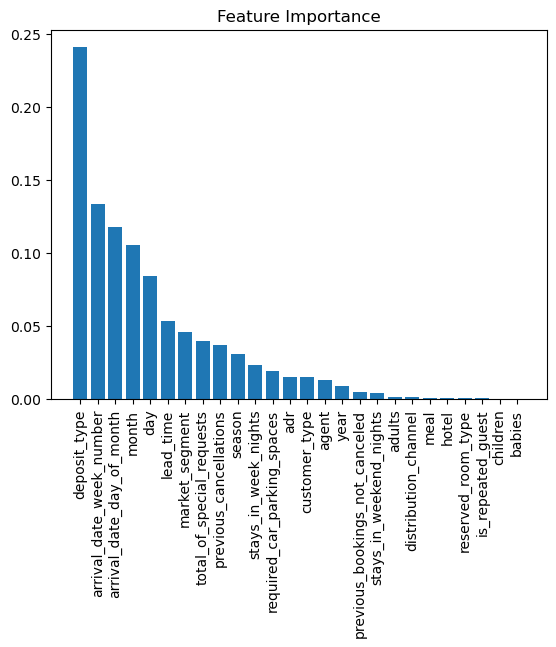

In [78]:
importances = pipeline_gb_best.named_steps['model'].feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

names = [feature_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(len(feature_names)), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(len(feature_names)), names, rotation=90)

# Show plot
plt.show()

Apparently, `deposit_type` is the biggest factor for model to decide whether a client will cancel their reservation or not. We can gain insights from this by analysing further.

In [81]:
grouped_df = data_clean.groupby(['deposit_type', 'is_canceled']).size().unstack(fill_value=0).reset_index()

# Rename the columns for clarity
grouped_df.columns = ['deposit_type', '0_count', '1_count']

# Print the result
print(grouped_df)

  deposit_type  0_count  1_count
0   No Deposit    74792    29669
1   Non Refund       93    14494
2   Refundable      126       36


A very high number of clients that book with `Non Refund` policy cancelled their bookings, almost 100% of them. The hotel should fix this policy to reduce their cancellation rate.

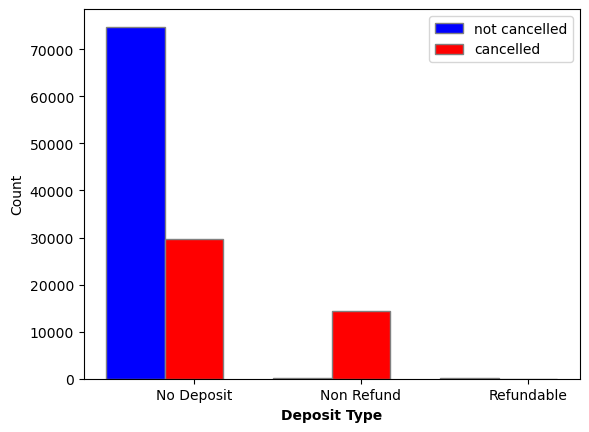

In [88]:
bar_width = 0.35

# Get the x locations for the groups
r1 = range(len(grouped_df['deposit_type']))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.bar(r1, grouped_df['0_count'], color='b', width=bar_width, edgecolor='grey', label='not cancelled')
plt.bar(r2, grouped_df['1_count'], color='r', width=bar_width, edgecolor='grey', label='cancelled')

# Adding labels
plt.xlabel('Deposit Type', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(grouped_df['0_count']))], grouped_df['deposit_type'])
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

# XI. - MODEL SAVING

In [87]:
with open('deployment\\pipeline_best.pkl', 'wb') as file_1:
    pickle.dump(pipeline_gb_best, file_1)

# XII. - Model Inference

Model Inference will be done in `inference.ipynb`

# XIII. - Conclusion

Hotel booking cancellations are a major problem for the hotel industry, as they might cause significant revenue losses to the owner. Moreover, cancellations are often unpredictable and depend a lot factors, such as the deposit type, the customer profile, and the seasonality. Therefore, it is important for hotel managers to have a way of forecasting the demand and the cancellation probability for each booking, so that they can optimize their pricing, inventory, and operational strategies. XYZ a tourism company that have been experiencing a lot of cancellation in some of their hotel. They need a classification machine learning model that can help them forecast whether or not a customer is going to cancel their booking. In this project I'm trying to build a clasification model using Hotel Booking Demand Dataset.

Before creating the model, I need to perform an exploratory analysis on the dataset. Here are insights and recommendations I composed based on the analisis that I've done:

1. both hotels are very popular in europian countries, especially Portugal, so XYZ should target more guests from these countries. They also should try to explore market potential in countries nearby those countries, as the citizens may have similar preferences or needs. They should also increase their customer loyalty by customizing their services based on those countries cultures, for example serving sourthern europian dishes, or offering promos on those countries national holidays.

2. Both hotel has similar seasonal pattern where the peak arrival of customers are in August, while the lowest arrival of custumers are in January. To adress this, the company should prepare for their services in summer season, especially in August. This recommendation also supported by the fact that summer is holiday season in most europian countries, especially Portugal. To prepare apropriately, the company should also acknowledge the fact that their hotels are not popular in winter, the lowest in January, and will gradually rises again at the end of winter (February).

3. In both hotel, the cancellation is highest in Summer, this makes sense as the reservations are also peaked at Summer. To address this, the company may have to implement some policies to discourage cancellations, especially in the Summer seasons, when the demand is high. For example, the company can charge a cancellation fee.

4. There is a significance difference between the average daily rate generated by city hotel compared to resort hotel. City hotel was having higher `idr` generated. XYZ should focus on their city hotel, since it generates more money for them.

The models created in this project shows a perfect or almost perfect precision test. This means the model can almost always guessed correctly the canceled reservations.

After analyzing each feature importance based on the model, I found out that deposit type is the biggest factor deciding whether a customer will cancel their booking or not. After analyzing further, I identified that bookings with Non Refundable deposit type has almost 100% cancellation rate. To fix this, XYZ can review their refund policy. For example, removing Non-Refundable choice, while adding a deposit type called refundable partially.